# Diabetes detection
In this notebook we will explore how to detect diabetes from some indicators.

# Libraries

In [1]:
# basic
import sys
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data processing

# show versions installed
print(f'Python version {sys.version}')
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version {np.__version__}')

Python version 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.3.2
Numpy version 1.26.4


# Data
Import and process data

In [2]:
# import data
df=pd.read_csv(r'data/diabetes_dataset.csv')
# general infomration from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [3]:
df.head(5)

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [4]:
# checking null or NA values
null_values=df.isnull().sum()
if null_values.sum()==0:
    print('There are NO null values!')
else:
    print('There are null values!')

na_values=df.isna().sum()
if na_values.sum()==0:
    print('There are NO na values!')
else:
    print('There are NA values')

There are NO null values!
There are NO na values!


We can carry out various studies using one of following predictors:
- **Binary classification** using `diagnosed_diabetes` (yes/no)
- **Multiclass classification** using `diabetes_stage`
- **Regression** using:
    - `glucose_fasting`
    - `hba1c`
    - `diabetes_risk_score`

Therefore, we will separate these targets form the dataset.

In [5]:
# separating predictors and targets
X=df.drop(columns=['diagnosed_diabetes', 'diabetes_stage', 'glucose_fasting','hba1c', 'diabetes_risk_score'])

# targets

# binary classification
y_bin=df['diagnosed_diabetes']
# multiclass classification
y_multi=df['diabetes_stage']
# regresion
y_reg=df['diabetes_risk_score']

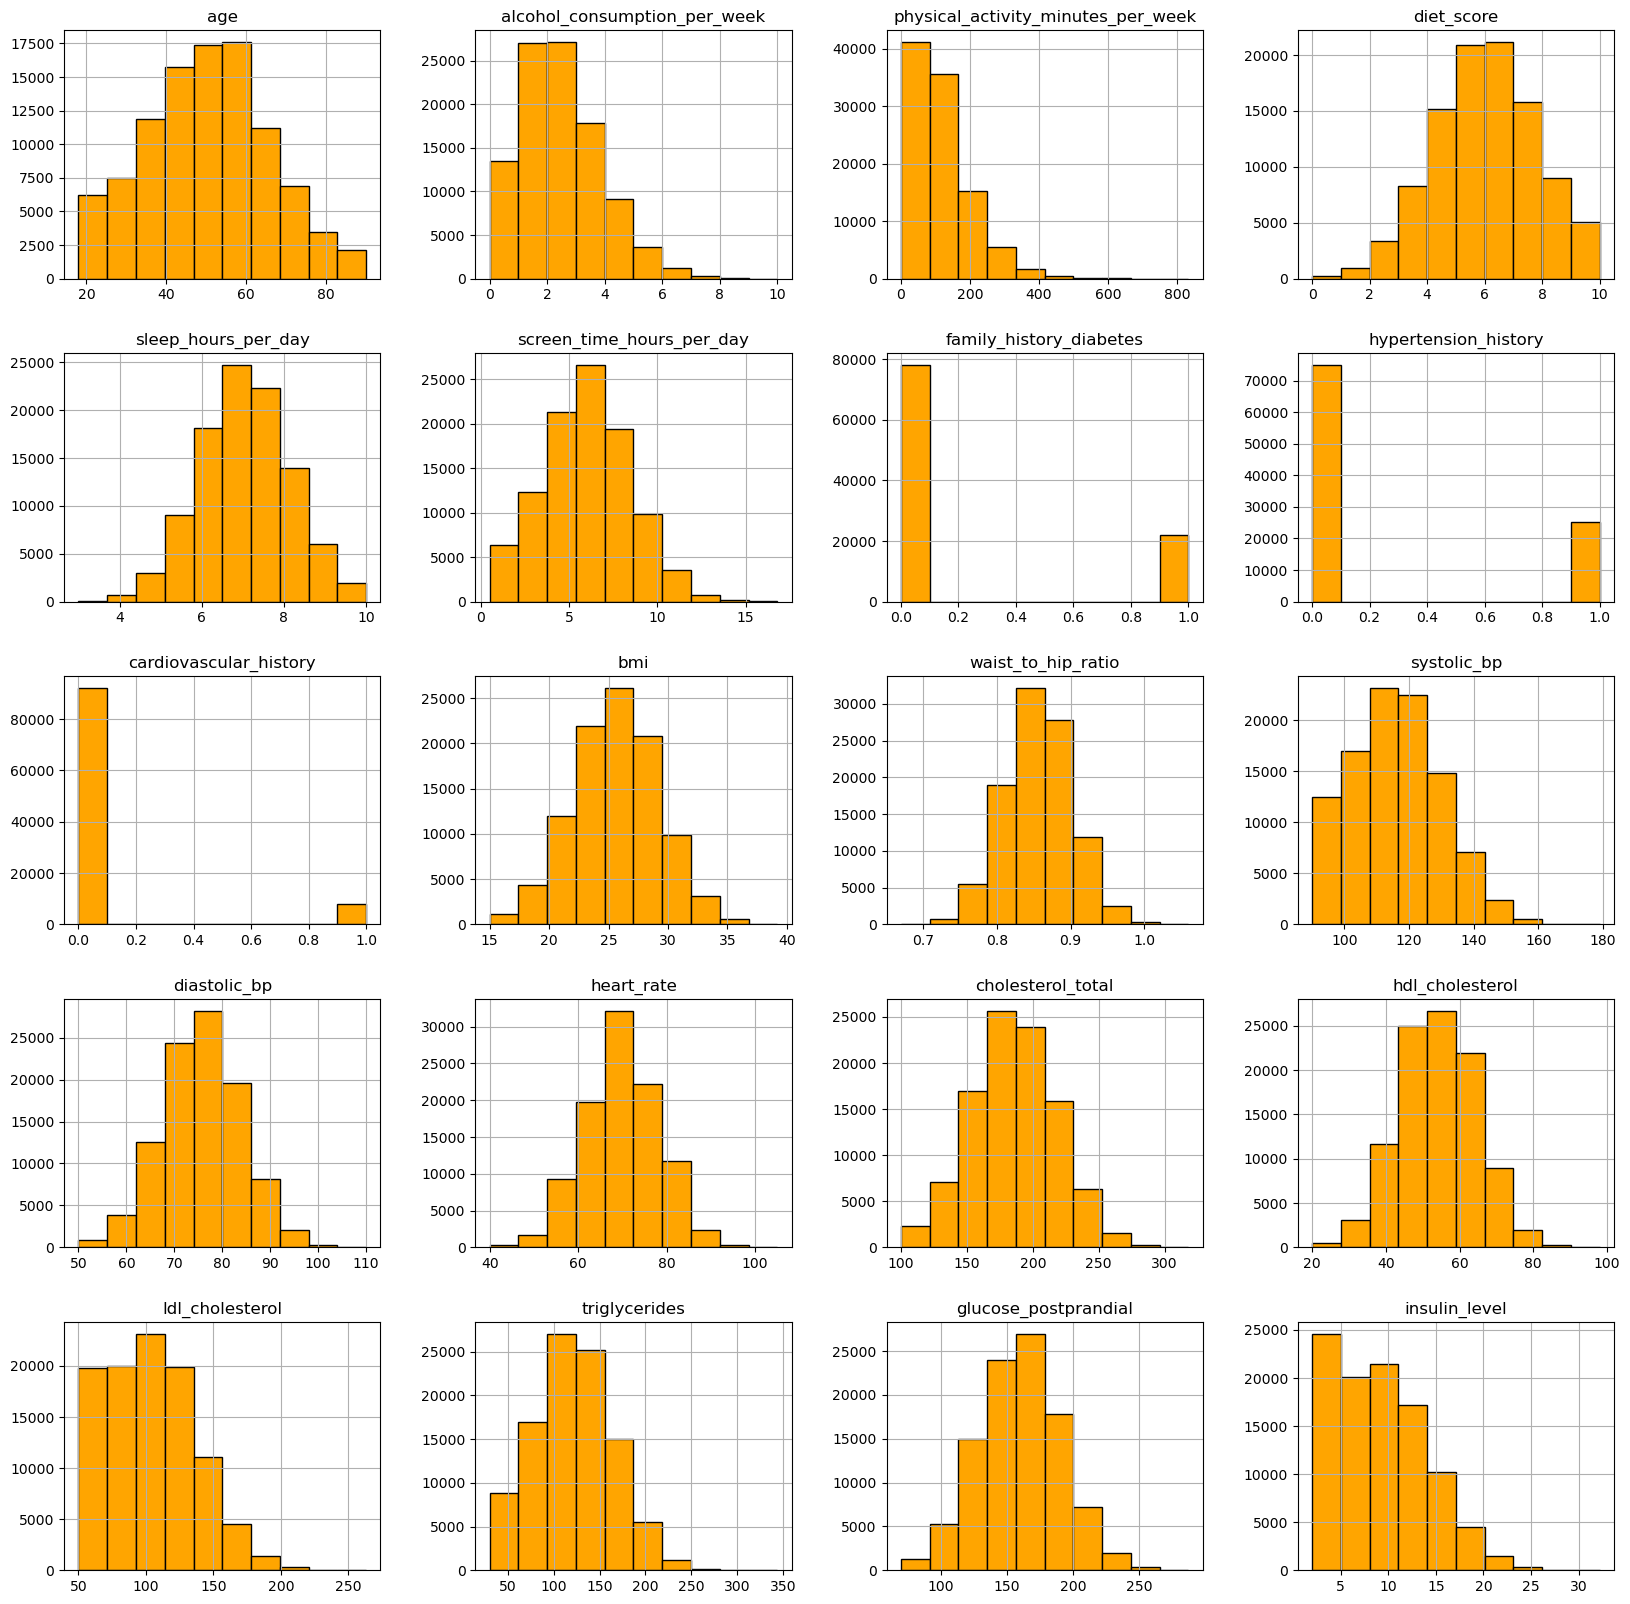

In [6]:
X.hist(figsize=(20,20), edgecolor='black', color='orange')
plt.show()

We can identify 3 categorical variables inside X predictors:
- `family_history_diabetes`
- `hypertension_history`
- `cardiovascular_history`

then, we will separate out from X predcitors and we will create two datasets with categroical and numerical data

In [7]:
# numerical predictors
X_num=X.drop(columns=['family_history_diabetes','hypertension_history', 'cardiovascular_history'])
# categorical predictors
X_cat=X[['family_history_diabetes','hypertension_history', 'cardiovascular_history']]

# EDA

## Binary analysis

In [8]:
df_bin_num=pd.concat([X_num, y_bin], axis=1)

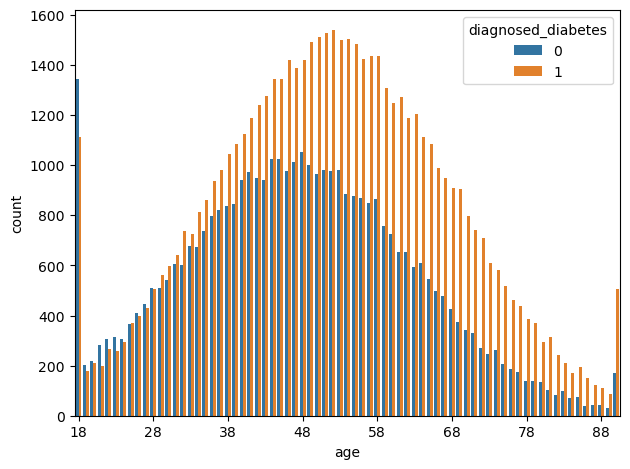

In [9]:
# demographic columns
demographic_columns=['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status']

# grpahing demographic vs binary data 
ax=sns.countplot(data=df_bin_num, x='age', hue='diagnosed_diabetes')

# showing some ticks
labels = ax.get_xticklabels()[::10]   # take each 10
positions = ax.get_xticks()[::10]     # posicion
ax.set_xticks(positions)
ax.set_xticklabels([label.get_text() for label in labels])

plt.tight_layout()
plt.show()

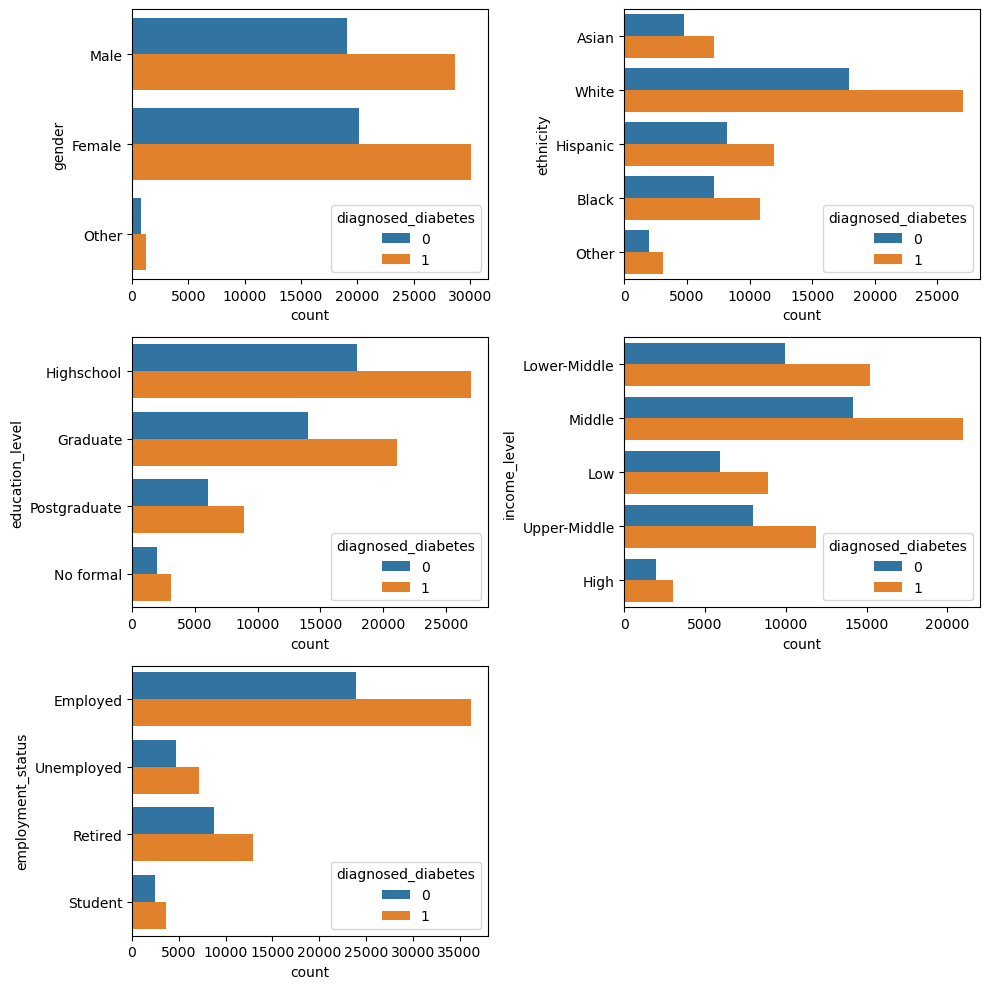

In [10]:
fig, axes=plt.subplots(3,2, figsize=(10,10))
axes=axes.flatten()

for i, column in enumerate(demographic_columns):
    sns.countplot(data=df_bin_num, y=column, hue='diagnosed_diabetes', ax=axes[i])

for j in range(len(demographic_columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

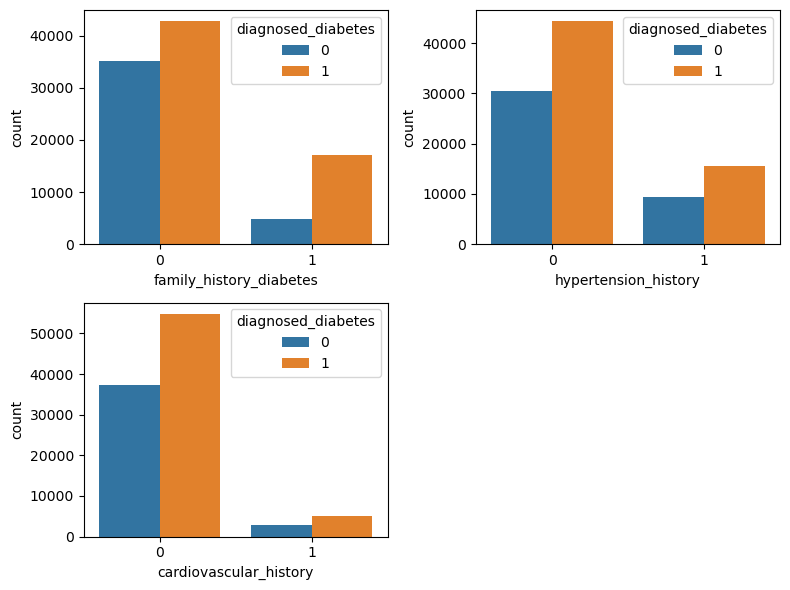

In [11]:
# combine categorical values and binary target
df_cat_bin=pd.concat([X_cat, y_bin], axis=1)

fig, axes=plt.subplots(2,2, figsize=(8,6))
axes=axes.flatten()

for i, column in enumerate(X_cat.columns):
    sns.countplot(data=df_cat_bin, x=column, hue='diagnosed_diabetes', ax=axes[i])

for j in range(len(X_cat.columns), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

## Multiclass analysis

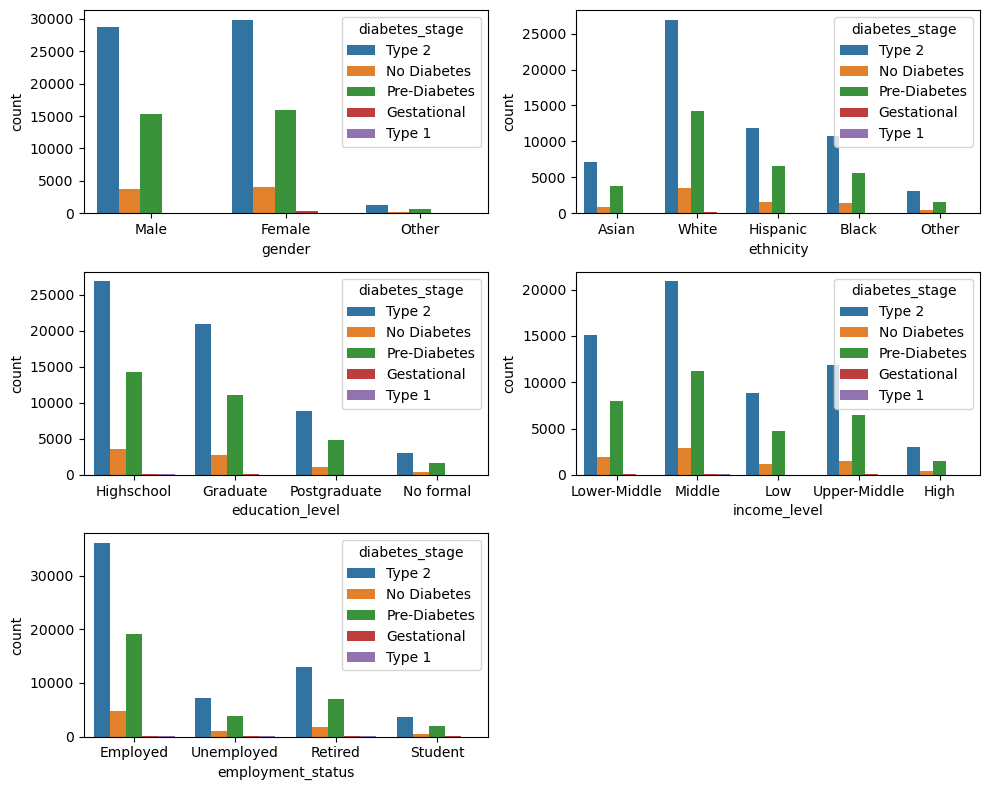

In [12]:
# put together numeric and multiclass target in a single dataframe
df_num_multi=pd.concat([X_num, y_multi], axis=1)

fig, axes=plt.subplots(3,2, figsize=(10,8))
axes=axes.flatten()

for i, column in enumerate(demographic_columns):
    sns.countplot(data=df_num_multi, x=column, ax=axes[i], hue='diabetes_stage')

for j in range(len(demographic_columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

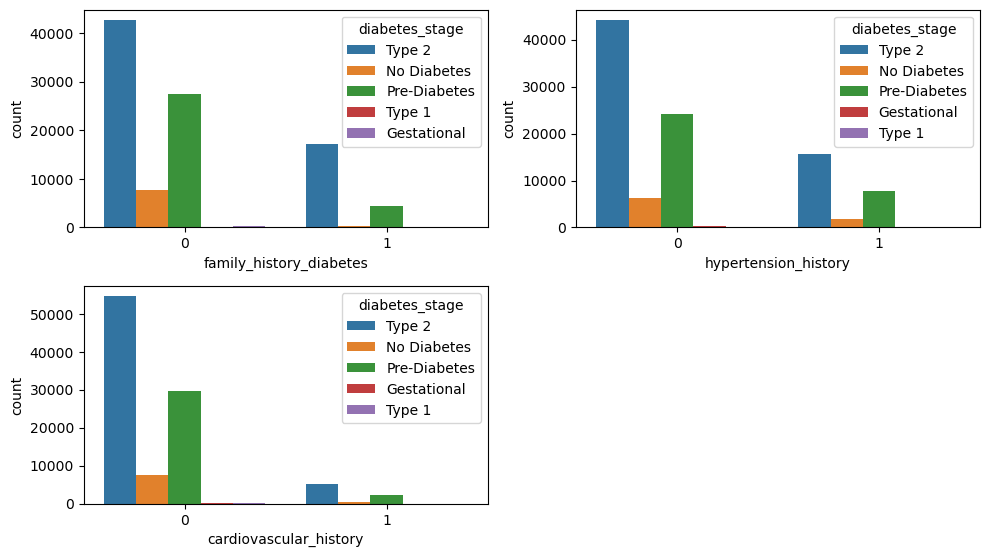

In [16]:
# put together numeric and multiclass target in a single dataframe
df_cat_multi=pd.concat([X_cat, y_multi], axis=1)

fig, axes=plt.subplots(3,2, figsize=(10,8))
axes=axes.flatten()

for i, column in enumerate(X_cat.columns):
    sns.countplot(data=df_cat_multi, x=column, ax=axes[i], hue='diabetes_stage')

for j in range(len(X_cat.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

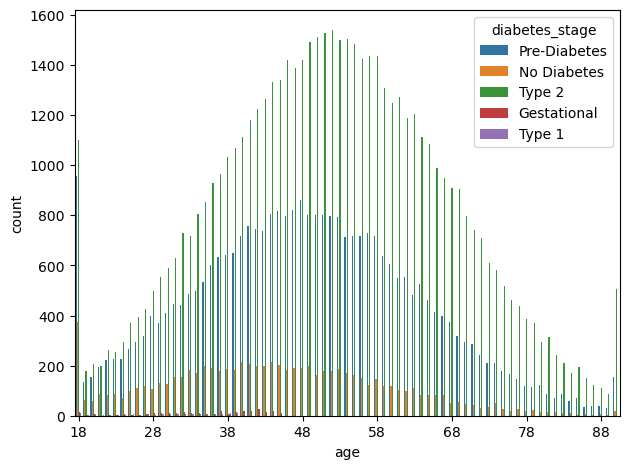

In [20]:
# demographic columns
demographic_columns=['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status']

# grpahing demographic vs binary data 
ax=sns.countplot(data=df_num_multi, x='age', hue='diabetes_stage')

# showing some ticks
labels = ax.get_xticklabels()[::10]   # take each 10
positions = ax.get_xticks()[::10]     # posicion
ax.set_xticks(positions)
ax.set_xticklabels([label.get_text() for label in labels])

plt.tight_layout()
plt.show()

## Correlation map

In [22]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [21]:
corr=X_num.corr()

sns.heatmap(corr, annot=True)

ValueError: could not convert string to float: 'Male'

In [13]:
# from predictores, separate object type variabeles
object_columns=X.dtypes[X.dtypes=='object'].index.tolist()

# convert to dummy variables object columns
X_object_encoded=pd.get_dummies(X[object_columns], dtype=int)

# combine dummy with numeric predictors
X_numeric=X.drop(columns=object_columns)
X_encoded=pd.concat([X_object_encoded, X_numeric], axis=1)

if 'object' in X_encoded.dtypes:
    print('There are some objects in dataset')
else:
    print('X dataframe has been converted, there are NO object values')

X dataframe has been converted, there are NO object values


<Axes: >

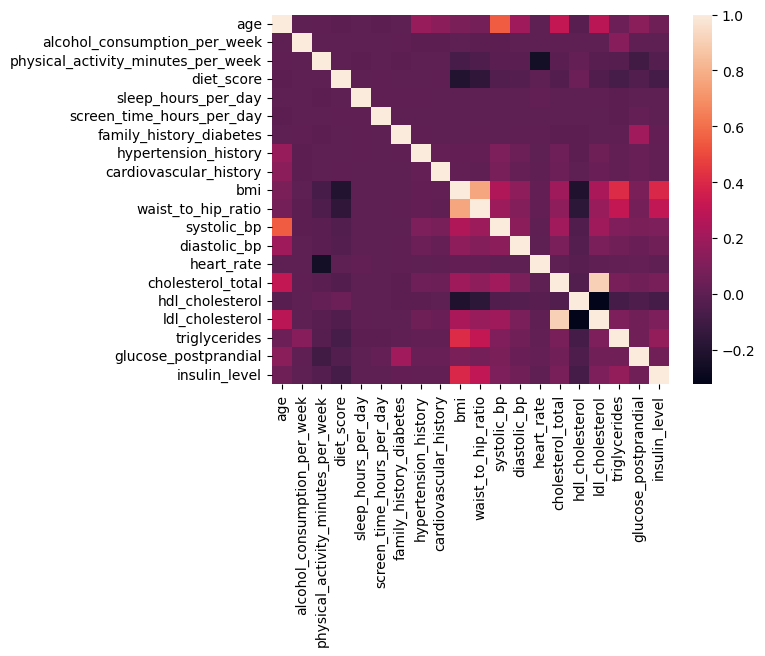

In [23]:
cor=X_numeric.corr()
sns.heatmap(cor)